

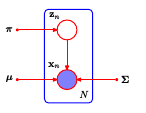

Fig.6 Graphical representation of a Gaussian mixture model for a set of N i.i.d. data points {xn }, with corresponding latent points {zn }, where n = 1, . . . , N .

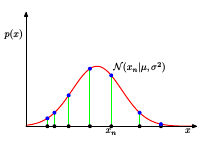

Fig.14 Illustration of the likelihood function for a Gaussian distribution, shown by the red curve. Here the black points de- note a data set of values {xn }, and the likelihood function given by (1.53) corresponds to the product of the blue values. Maximizing the likelihood in- volves adjusting the mean and vari- ance of the Gaussian so as to maxi- mize this product.

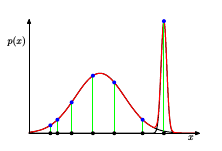

Fig.7 Illustration of how singularities in the likelihood function arise with mixtures of Gaussians. This should be com- pared with the case of a single Gaus- sian shown in Fig.14 for which no singularities arise.


## Maximum Likelihood for Gaussian Mixture Models

## Introduction

Suppose we have a data set of observations $\{x_1, \dots, x_N\}$, and we wish to model this data using a mixture of Gaussians. We can represent this data set as an $N \times D$ matrix $X$, where the $n$-th row is given by $\mathbf{x}_n^T$. Similarly, the corresponding latent variables will be denoted by an $N \times K$ matrix $Z$ with rows $\mathbf{z}_n^T$.

If we assume that the data points are drawn independently from the distribution, we can express the Gaussian mixture model for this i.i.d. data set using the graphical representation shown below.

### Graphical Representation

The graphical model for a Gaussian mixture is depicted in the figure below:

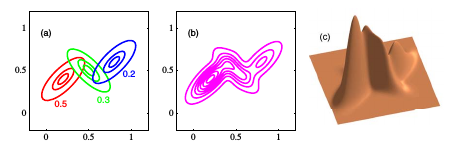

Fig.23 Illustration of a mixture of 3 Gaussians in a two-dimensional space. (a) Contours of constant density for each of the mixture components, in which the 3 components are denoted red, blue and green, and the values of the mixing coefﬁcients are shown below each component. (b) Contours of the marginal probability density p(x) of the mixture distribution. (c) A surface plot of the distribution p(x).


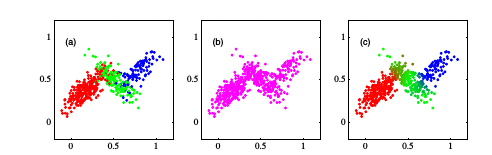

Fig.5 Example of 500 points drawn from the mixture of 3 Gaussians shown in Fig.23. (a) Samples from the joint distribution p(z)p(x|z) in which the three states of z, corresponding to the three components of the mixture, are depicted in red, green, and blue, and (b) the corresponding samples from the marginal distribution p(x), which is obtained by simply ignoring the values of z and just plotting the x values. The data set in (a) is said to be complete, whereas that in (b) is incomplete. (c) The same samples in which the colours represent the value of the responsibilities γ(znk ) associated with data point xn , obtained by plotting the corresponding point using proportions of red, blue, and green ink given by γ(znk ) for k = 1, 2, 3, respectively
Here, $z_n$ represents the latent variables, $\mathbf{x}_n$ the observed data, and the parameters include $\pi$, $\mu$, and $\Sigma$.

## Log Likelihood Function

From the mixture model, the log of the likelihood function is given by:

$$
\ln p(X | \pi, \mu, \Sigma) = \sum_{n=1}^N \ln \left( \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}_n | \mu_k, \Sigma_k) \right).
$$

This equation introduces challenges due to the summation inside the logarithm, which complicates optimization.

## Issues with Maximum Likelihood

### Singularities in the Likelihood Function

A significant problem with maximum likelihood in Gaussian mixture models is the presence of singularities. For example, consider a Gaussian mixture where the covariance matrices are isotropic $(\Sigma_k = \sigma_k^2 \mathbf{I}$):

1. If one of the components $j$ collapses onto a specific data point, say $\mu_j = \mathbf{x}_n$, the likelihood term becomes:

   $$
   \mathcal{N}(\mathbf{x}_n | \mathbf{x}_n, \sigma_j^2 \mathbf{I}) = \frac{1}{(2\pi)^{D/2} \sigma_j^D}.
   $$

2. As $\sigma_j \to 0$, this term tends to infinity, causing the log likelihood to diverge.

3. This pathological behavior does not occur in a single Gaussian because the likelihood for other data points decays exponentially, ensuring an overall likelihood of zero rather than infinity.

### Identifiability

Another issue arises due to the equivalence of $K!$ permutations of parameters in a $K$-component mixture. For any maximum likelihood solution, there are $K!$ equivalent solutions corresponding to different assignments of parameters. While this is irrelevant for density modeling, it complicates the interpretation of parameters.

## Avoiding Singularities

To avoid these singularities, heuristic approaches can be applied, such as:

- Detecting when a Gaussian component collapses and resetting its parameters $(\mu$, $\Sigma$).
- Adding a regularization term to the covariance matrix to ensure finite variances.

## Optimizing the Log Likelihood

Unlike a single Gaussian, the log likelihood for a mixture model does not yield a closed-form solution when derivatives are set to zero. This is due to the summation over $k$ inside the logarithm. Optimization techniques include:

- **Gradient-based methods** (e.g., Fletcher, 1987; Nocedal and Wright, 1999; Bishop and Nabney, 2008).
- **Expectation-Maximization (EM) algorithm**, which iteratively optimizes the log likelihood by alternating between:
  - **E-step**: Estimating responsibilities $(\gamma(z_{nk})$).
  - **M-step**: Updating model parameters $(\pi, \mu, \Sigma$).

The EM algorithm is widely used and forms the foundation for variational inference techniques.

## Summary

Maximizing the log likelihood for Gaussian mixture models is challenging due to singularities and identifiability issues. The EM algorithm provides an effective solution by iteratively improving parameter estimates, avoiding direct optimization of the complex log likelihood function.



In [3]:
import math
import random

# Helper function to calculate the Gaussian PDF
def gaussian_pdf(x, mean, covariance):
    """
    Compute the Gaussian Probability Density Function (PDF) for a single data point.
    Assumes diagonal covariance for simplicity.
    """
    import math
    
    dim = len(mean)
    
    # Compute the product of diagonal covariance elements
    det_cov = 1
    for val in covariance:
        det_cov *= val
    
    # Calculate normalization factor
    norm_factor = 1 / math.sqrt((2 * math.pi) ** dim * det_cov)
    
    # Calculate the exponent
    diff = [x[i] - mean[i] for i in range(dim)]
    exponent = sum((diff[i] ** 2) / covariance[i] for i in range(dim))
    
    return norm_factor * math.exp(-0.5 * exponent)


# Initialize the GMM parameters
def initialize_gmm(data, n_components):
    """
    Initialize the GMM parameters randomly.
    """
    n_features = len(data[0])
    means = [[random.uniform(min(f), max(f)) for f in zip(*data)] for _ in range(n_components)]
    covariances = [[1.0] * n_features for _ in range(n_components)]
    mixing_coeffs = [1 / n_components] * n_components
    return means, covariances, mixing_coeffs

# E-step: Compute responsibilities
def e_step(data, means, covariances, mixing_coeffs):
    """
    Perform the E-step: calculate the responsibilities.
    """
    responsibilities = []
    for x in data:
        total_prob = 0
        probs = []
        for k in range(len(means)):
            prob = mixing_coeffs[k] * gaussian_pdf(x, means[k], covariances[k])
            probs.append(prob)
            total_prob += prob
        responsibilities.append([p / total_prob for p in probs])
    return responsibilities

# M-step: Update parameters
def m_step(data, responsibilities):
    """
    Perform the M-step: update means, covariances, and mixing coefficients.
    """
    n_components = len(responsibilities[0])
    n_features = len(data[0])
    n_samples = len(data)
    
    means = [[0.0] * n_features for _ in range(n_components)]
    covariances = [[0.0] * n_features for _ in range(n_components)]
    mixing_coeffs = [0.0] * n_components
    
    for k in range(n_components):
        Nk = sum(r[k] for r in responsibilities)
        mixing_coeffs[k] = Nk / n_samples
        for j in range(n_features):
            means[k][j] = sum(responsibilities[i][k] * data[i][j] for i in range(n_samples)) / Nk
            covariances[k][j] = (
                sum(responsibilities[i][k] * (data[i][j] - means[k][j]) ** 2 for i in range(n_samples)) / Nk
            )
    
    return means, covariances, mixing_coeffs

# EM algorithm for GMM
def fit_gmm(data, n_components, max_iterations=100, tol=1e-4):
    """
    Fit a Gaussian Mixture Model to the data using the EM algorithm.
    """
    means, covariances, mixing_coeffs = initialize_gmm(data, n_components)
    log_likelihoods = []
    
    for iteration in range(max_iterations):
        # E-step
        responsibilities = e_step(data, means, covariances, mixing_coeffs)
        
        # M-step
        means, covariances, mixing_coeffs = m_step(data, responsibilities)
        
        # Compute log likelihood
        log_likelihood = 0
        for x in data:
            likelihood = sum(
                mixing_coeffs[k] * gaussian_pdf(x, means[k], covariances[k])
                for k in range(n_components)
            )
            log_likelihood += math.log(likelihood)
        
        log_likelihoods.append(log_likelihood)
        print(f"Iteration {iteration + 1}, Log Likelihood: {log_likelihood}")
        
        # Check for convergence
        if iteration > 0 and abs(log_likelihood - log_likelihoods[-2]) < tol:
            print(f"Convergence reached at iteration {iteration + 1}.")
            break
    
    return means, covariances, mixing_coeffs, responsibilities, log_likelihoods

# Example: Generate data
def generate_data():
    """
    Generate sample data for testing the GMM.
    """
    data = []
    means = [[2, 2], [8, 8], [5, 1]]
    for mean in means:
        for _ in range(100):
            data.append([random.gauss(mean[0], 1), random.gauss(mean[1], 1)])
    return data

# Main
if __name__ == "__main__":
    # Generate synthetic data
    data = generate_data()
    
    # Fit GMM using the EM algorithm
    n_components = 3
    means, covariances, mixing_coeffs, responsibilities, log_likelihoods = fit_gmm(data, n_components)
    
    # Print the results
    print("\nFinal Parameters:")
    print("Means:", means)
    print("Covariances:", covariances)
    print("Mixing Coefficients:", mixing_coeffs)


Iteration 1, Log Likelihood: -1287.3378616102136
Iteration 2, Log Likelihood: -1241.6727787943194
Iteration 3, Log Likelihood: -1180.0093508136515
Iteration 4, Log Likelihood: -1158.018615671339
Iteration 5, Log Likelihood: -1154.8179849519872
Iteration 6, Log Likelihood: -1149.8384096166808
Iteration 7, Log Likelihood: -1143.2826862199663
Iteration 8, Log Likelihood: -1136.9714766389889
Iteration 9, Log Likelihood: -1133.0063396586202
Iteration 10, Log Likelihood: -1131.184514145793
Iteration 11, Log Likelihood: -1130.156745746382
Iteration 12, Log Likelihood: -1129.213181401684
Iteration 13, Log Likelihood: -1128.1803089092693
Iteration 14, Log Likelihood: -1127.1205399492717
Iteration 15, Log Likelihood: -1126.1814985970962
Iteration 16, Log Likelihood: -1125.4660685479773
Iteration 17, Log Likelihood: -1124.9898574907008
Iteration 18, Log Likelihood: -1124.7060235321262
Iteration 19, Log Likelihood: -1124.5489060231175
Iteration 20, Log Likelihood: -1124.465172053313
Iteration 21, 

Iteration 1, Log Likelihood: -1277.152653832197
Iteration 2, Log Likelihood: -1231.1019914998326
Iteration 3, Log Likelihood: -1172.2317512562197
Iteration 4, Log Likelihood: -1148.373596026855
Iteration 5, Log Likelihood: -1147.1729928203677
Iteration 6, Log Likelihood: -1146.149694431933
Iteration 7, Log Likelihood: -1145.280606776718
Iteration 8, Log Likelihood: -1144.5578351482911
Iteration 9, Log Likelihood: -1143.9736320047264
Iteration 10, Log Likelihood: -1143.515382403765
Iteration 11, Log Likelihood: -1143.1657522256264
Iteration 12, Log Likelihood: -1142.9051269506974
Iteration 13, Log Likelihood: -1142.7142991168648
Iteration 14, Log Likelihood: -1142.5763307524965
Iteration 15, Log Likelihood: -1142.4773713613802
Iteration 16, Log Likelihood: -1142.4066869331718
Iteration 17, Log Likelihood: -1142.3562630870172
Iteration 18, Log Likelihood: -1142.3202637944498
Iteration 19, Log Likelihood: -1142.2945063735172
Iteration 20, Log Likelihood: -1142.2760207213623
Iteration 21, 

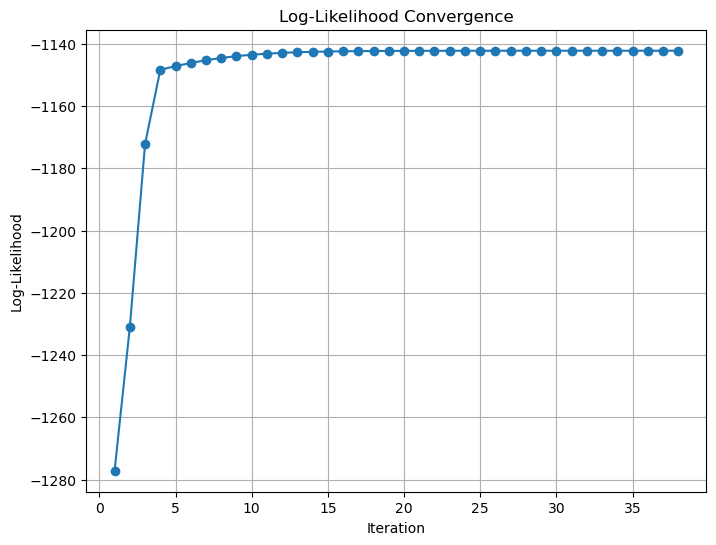

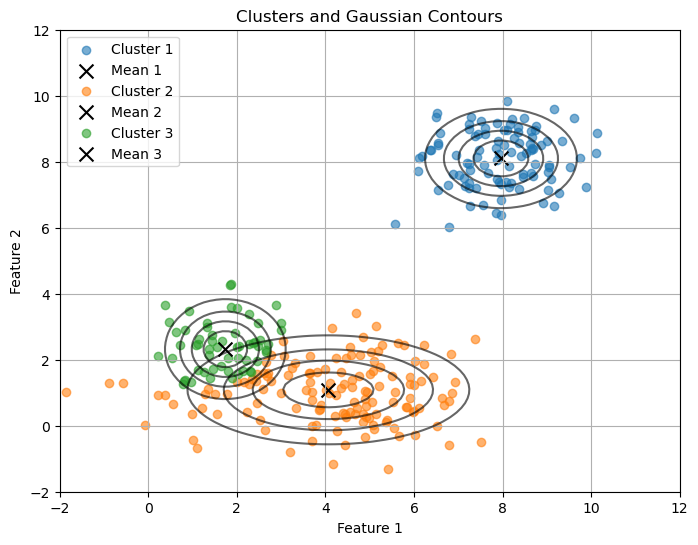

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot log-likelihood convergence
def plot_log_likelihood(log_likelihoods):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(log_likelihoods) + 1), log_likelihoods, marker='o')
    plt.title('Log-Likelihood Convergence')
    plt.xlabel('Iteration')
    plt.ylabel('Log-Likelihood')
    plt.grid()
    plt.show()

# Function to plot data with cluster assignments
def plot_clusters(data, responsibilities, means, covariances):
    data = np.array(data)
    responsibilities = np.array(responsibilities)
    
    # Assign each data point to the cluster with highest responsibility
    cluster_assignments = np.argmax(responsibilities, axis=1)
    
    plt.figure(figsize=(8, 6))
    
    # Plot data points
    for k in range(len(means)):
        cluster_points = data[cluster_assignments == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k + 1}', alpha=0.6)
        
        # Plot Gaussian centers
        plt.scatter(means[k][0], means[k][1], color='k', marker='x', s=100, label=f'Mean {k + 1}')
        
        # Plot Gaussian contours
        plot_gaussian_contour(means[k], covariances[k])
    
    plt.title('Clusters and Gaussian Contours')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Helper function to plot Gaussian contours
def plot_gaussian_contour(mean, covariance):
    x, y = np.meshgrid(np.linspace(-2, 12, 100), np.linspace(-2, 12, 100))
    pos = np.dstack((x, y))
    
    # Compute multivariate Gaussian PDF
    rv = multivariate_normal(mean=mean, cov=np.diag(covariance))
    plt.contour(x, y, rv.pdf(pos), levels=5, colors='black', alpha=0.6)

# Main
if __name__ == "__main__":
    from scipy.stats import multivariate_normal  # Required for contour plotting

    # Generate synthetic data
    data = generate_data()
    
    # Fit GMM using the EM algorithm
    n_components = 3
    means, covariances, mixing_coeffs, responsibilities, log_likelihoods = fit_gmm(data, n_components)
    
    # Plot log-likelihood convergence
    plot_log_likelihood(log_likelihoods)
    
    # Plot data clusters and Gaussian contours
    plot_clusters(data, responsibilities, means, covariances)


## EM Algorithm for Gaussian Mixtures

The Expectation-Maximization (EM) algorithm is a powerful technique for finding maximum likelihood solutions in models with latent variables. This section provides an overview of the EM algorithm applied to the Gaussian Mixture Model (GMM).

## Maximum Likelihood for GMM

The likelihood for the GMM can be written as:

$$
p(X | \pi, \mu, \Sigma) = \prod_{n=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k),
$$

where:
- $ \pi_k $ are the mixing coefficients, satisfying $ \sum_{k=1}^K \pi_k = 1 $,
- $ \mathcal{N}(x_n | \mu_k, \Sigma_k) $ is the Gaussian density for cluster $ k $,
- $ \mu_k $ and $ \Sigma_k $ are the mean and covariance of cluster $ k $,
- $ X = \{x_1, x_2, \dots, x_N\} $ is the dataset.

To maximize the log-likelihood:

$$
\ln p(X | \pi, \mu, \Sigma) = \sum_{n=1}^N \ln \left( \sum_{k=1}^K \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k) \right),
$$

we use the EM algorithm.

---

## EM Algorithm Steps

1. **E-Step (Expectation Step)**

   Compute the responsibilities $ \gamma(z_{nk}) $, the posterior probability that component $ k $ generated $ x_n $:

   $$
   \gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)}.
   $$

2. **M-Step (Maximization Step)**

   Update the parameters $ \mu_k $, $ \Sigma_k $, and $ \pi_k $ using the responsibilities:

   - **Means**:
     $$
     \mu_k = \frac{\sum_{n=1}^N \gamma(z_{nk}) x_n}{N_k},
     $$
     where $ N_k = \sum_{n=1}^N \gamma(z_{nk}) $ is the effective number of points assigned to cluster $ k $.

   - **Covariances**:
     $$
     \Sigma_k = \frac{\sum_{n=1}^N \gamma(z_{nk}) (x_n - \mu_k)(x_n - \mu_k)^T}{N_k}.
     $$

   - **Mixing Coefficients**:
     $$
     \pi_k = \frac{N_k}{N}.
     $$

3. **Convergence Criterion**

   Iterate the E and M steps until the log-likelihood:

   $$
   \ln p(X | \pi, \mu, \Sigma)
   $$

   stops increasing or the change falls below a specified threshold.

---

## Illustration of the EM Algorithm

### Initialization
The algorithm begins by initializing the means $ \mu_k $, covariances $ \Sigma_k $, and mixing coefficients $ \pi_k $.

### Iterative Updates
- **E-Step**: Compute responsibilities $ \gamma(z_{nk}) $.
- **M-Step**: Update $ \mu_k $, $ \Sigma_k $, and $ \pi_k $.

### Convergence
Each iteration increases the log-likelihood, guaranteeing convergence to a local maximum.

### Example: Two Gaussian Mixtures
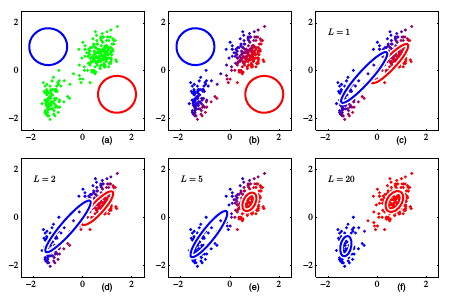

Fig.8 Illustration of the EM algorithm using the Old Faithful set as used for the illustration of the K-means algorithm in Fig.1. See the text for details.

Fig.8 illustrates the EM algorithm for a mixture of two Gaussians applied to the rescaled Old Faithful dataset.

- **Plot (a)**: Initial configuration of the mixture model.
- **Plots (b)-(f)**: Evolution of the EM algorithm after $ L = 2, 5, 20 $ iterations, showing the Gaussian contours and cluster assignments.

---

## Key Equations

- **Responsibilities**:
  $$
  \gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)}.
  $$

- **Mean Update**:
  $$
  \mu_k = \frac{\sum_{n=1}^N \gamma(z_{nk}) x_n}{N_k}.
  $$

- **Covariance Update**:
  $$
  \Sigma_k = \frac{\sum_{n=1}^N \gamma(z_{nk}) (x_n - \mu_k)(x_n - \mu_k)^T}{N_k}.
  $$

- **Mixing Coefficients Update**:
  $$
  \pi_k = \frac{N_k}{N}.
  $$

The EM algorithm is a foundational method for fitting Gaussian Mixture Models and serves as a precursor to advanced techniques like Variational Inference.

# EM Algorithm for Gaussian Mixtures

The EM algorithm iteratively refines the parameters of a Gaussian Mixture Model (GMM) to maximize the likelihood function. This section summarizes its steps and provides insights into its behavior and computational characteristics.

---

## Initialization

Start by initializing:
- Means $ \mu_k $,
- Covariances $ \Sigma_k $,
- Mixing coefficients $ \pi_k $.

Evaluate the initial value of the log-likelihood function:
$$
\ln p(X|\mu, \Sigma, \pi) = \sum_{n=1}^N \ln \left( \sum_{k=1}^K \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k) \right).
$$

---

## Iterative Updates

The algorithm alternates between two steps:

### 1. **E-Step (Expectation Step)**

Evaluate the responsibilities, $ \gamma(z_{nk}) $, which represent the posterior probabilities of each data point $ x_n $ being generated by component $ k $:
$$
\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)}.
$$

---

### 2. **M-Step (Maximization Step)**

Re-estimate the parameters based on the responsibilities:

- **Means**:
  $$
  \mu_k^{\text{new}} = \frac{\sum_{n=1}^N \gamma(z_{nk}) x_n}{N_k},
  $$
  where $ N_k $ is the effective number of points assigned to cluster $ k $:
  $$
  N_k = \sum_{n=1}^N \gamma(z_{nk}).
  $$

- **Covariances**:
  $$
  \Sigma_k^{\text{new}} = \frac{\sum_{n=1}^N \gamma(z_{nk}) (x_n - \mu_k^{\text{new}})(x_n - \mu_k^{\text{new}})^T}{N_k}.
  $$

- **Mixing Coefficients**:
  $$
  \pi_k^{\text{new}} = \frac{N_k}{N}.
  $$

---

### 3. Evaluate Log-Likelihood

Compute the log-likelihood:
$$
\ln p(X|\mu, \Sigma, \pi) = \sum_{n=1}^N \ln \left( \sum_{k=1}^K \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k) \right).
$$

---

## Convergence Criterion

Check if the change in log-likelihood or the parameters falls below a specified threshold. If not, repeat the E and M steps.

---

## Observations

1. **Initialization**: 
   - Use the K-means algorithm to initialize $ \mu_k $, $ \Sigma_k $, and $ \pi_k $.
   - Set $ \Sigma_k $ to the sample covariances of clusters found by K-means.
   - Set $ \pi_k $ to the fraction of points in each cluster.

2. **Iterations**:
   - Plot (b): After the initial E-step, data points are depicted using a proportion of blue or red ink based on posterior probabilities. Points with significant probability for both clusters appear purple.
   - Plot (c): After the first M-step, the Gaussian means and covariances update based on the "center of mass" of the respective cluster's responsibilities.
   - Plots (d)-(f): Show the progression of the algorithm after 2, 5, and 20 iterations, respectively. By plot (f), the algorithm is near convergence.

3. **Computation**:
   - The EM algorithm generally takes more iterations to converge compared to K-means.
   - Each iteration of EM is computationally more expensive due to the Gaussian evaluations.

4. **Singularities and Local Maxima**:
   - Avoid singularities where a Gaussian component collapses onto a single data point.
   - EM is not guaranteed to find the global maximum of the log-likelihood function.

---

## Summary of Steps

1. **Initialize** $ \mu_k, \Sigma_k, \pi_k $, and compute initial log-likelihood.
2. **E-Step**: Compute $ \gamma(z_{nk}) $.
3. **M-Step**: Update $ \mu_k, \Sigma_k, \pi_k $.
4. **Check Convergence**: If not converged, return to Step 2.



Converged at iteration 19


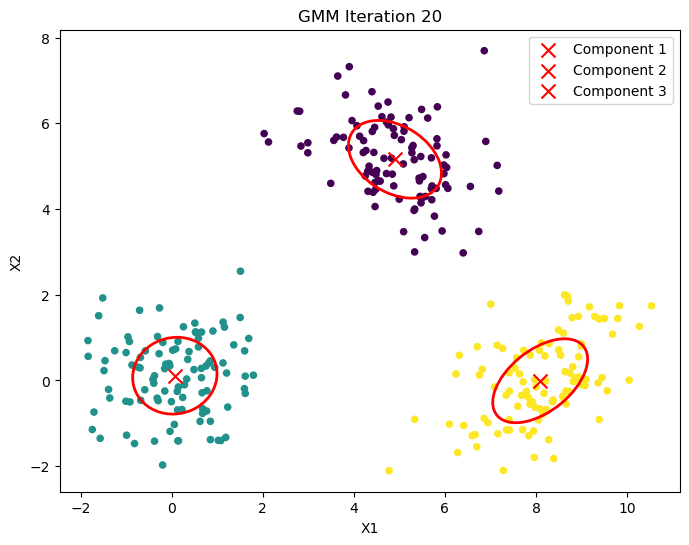

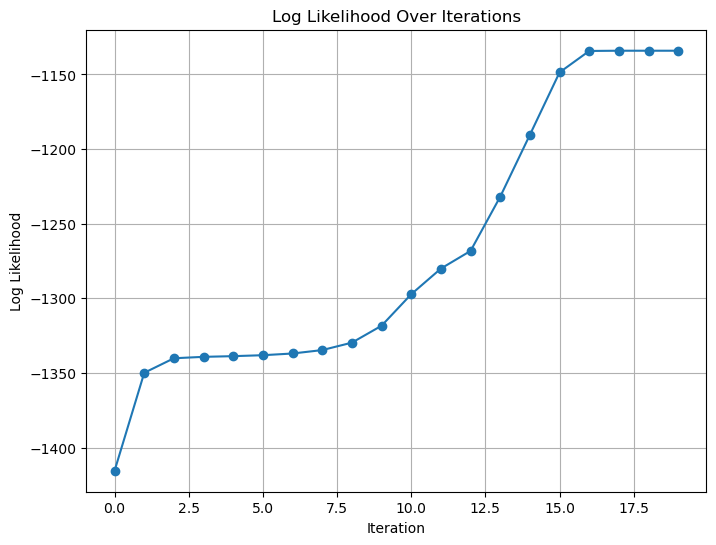

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def initialize_gmm(data, n_components):
    """Randomly initialize GMM parameters."""
    n_samples, n_features = data.shape
    means = data[np.random.choice(n_samples, n_components, replace=False)]
    covariances = [np.cov(data.T) for _ in range(n_components)]
    mixing_coeffs = np.ones(n_components) / n_components
    return means, covariances, mixing_coeffs

def e_step(data, means, covariances, mixing_coeffs):
    """E-step: Compute responsibilities."""
    n_samples, n_components = data.shape[0], len(means)
    responsibilities = np.zeros((n_samples, n_components))
    
    for k in range(n_components):
        responsibilities[:, k] = mixing_coeffs[k] * multivariate_normal.pdf(
            data, mean=means[k], cov=covariances[k]
        )
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities

def m_step(data, responsibilities):
    """M-step: Update GMM parameters."""
    n_samples, n_components = responsibilities.shape
    n_features = data.shape[1]
    
    N_k = responsibilities.sum(axis=0)
    means = np.dot(responsibilities.T, data) / N_k[:, np.newaxis]
    covariances = []
    for k in range(n_components):
        diff = data - means[k]
        covariances.append(
            np.dot((responsibilities[:, k][:, np.newaxis] * diff).T, diff) / N_k[k]
        )
    mixing_coeffs = N_k / n_samples
    return means, covariances, mixing_coeffs

def log_likelihood(data, means, covariances, mixing_coeffs):
    """Compute the log likelihood."""
    n_samples = data.shape[0]
    likelihood = 0
    for k in range(len(means)):
        likelihood += mixing_coeffs[k] * multivariate_normal.pdf(data, mean=means[k], cov=covariances[k])
    return np.sum(np.log(likelihood))

def fit_gmm(data, n_components, max_iter=100, tol=1e-6):
    """Fit GMM using the EM algorithm."""
    means, covariances, mixing_coeffs = initialize_gmm(data, n_components)
    log_likelihoods = []
    
    for iteration in range(max_iter):
        # E-step
        responsibilities = e_step(data, means, covariances, mixing_coeffs)
        
        # M-step
        means, covariances, mixing_coeffs = m_step(data, responsibilities)
        
        # Compute log likelihood
        log_likelihood_value = log_likelihood(data, means, covariances, mixing_coeffs)
        log_likelihoods.append(log_likelihood_value)
        
        # Check convergence
        if iteration > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            print(f"Converged at iteration {iteration}")
            break
    
    return means, covariances, mixing_coeffs, responsibilities, log_likelihoods

# Generate synthetic data
np.random.seed(42)
data1 = np.random.multivariate_normal([0, 0], [[1, 0.2], [0.2, 1]], size=100)
data2 = np.random.multivariate_normal([5, 5], [[1, -0.3], [-0.3, 1]], size=100)
data3 = np.random.multivariate_normal([8, 0], [[1, 0.5], [0.5, 1]], size=100)
data = np.vstack([data1, data2, data3])

# Fit GMM
n_components = 3
means, covariances, mixing_coeffs, responsibilities, log_likelihoods = fit_gmm(data, n_components)

# Visualization
def plot_gmm(data, means, covariances, responsibilities, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=responsibilities.argmax(axis=1), cmap='viridis', s=20)
    for k in range(len(means)):
        plt.scatter(*means[k], color='red', marker='x', s=100, label=f'Component {k + 1}')
        eigvals, eigvecs = np.linalg.eigh(covariances[k])
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
        width, height = 2 * np.sqrt(eigvals)
        from matplotlib.patches import Ellipse
        ellipse = Ellipse(means[k], width, height, angle, edgecolor='red', facecolor='none', lw=2)
        plt.gca().add_patch(ellipse)
    plt.title(f"GMM Iteration {iteration}")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()

# Plot results
plot_gmm(data, means, covariances, responsibilities, len(log_likelihoods))

# Plot log-likelihood
plt.figure(figsize=(8, 6))
plt.plot(log_likelihoods, marker='o')
plt.title("Log Likelihood Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")
plt.grid()
plt.show()


## **An Alternative View of the EM Algorithm**

The **Expectation-Maximization (EM) Algorithm** provides a powerful framework for finding maximum likelihood solutions for models with latent variables. This section presents a complementary view that emphasizes the role of **latent variables** in the EM process.

---

## **1. Overview**
The goal is to maximize the **log likelihood** of the observed data $ X $:
$$
\ln p(X | \theta) = \ln \sum_Z p(X, Z | \theta),
$$
where:
- $ \theta $: The set of model parameters.
- $ X $: Observed data.
- $ Z $: Latent (unobserved) variables.

The summation over latent variables $ Z $ is inside the logarithm, making direct maximization of $ \ln p(X | \theta) $ complex.

---

## **2. Complete vs. Incomplete Data**
- **Complete Data**: If both $ X $ (observed) and $ Z $ (latent) are available, the likelihood is:
  $$
  \ln p(X, Z | \theta).
  $$
  This is typically easier to maximize.

- **Incomplete Data**: When $ Z $ is unobserved, the marginalization over $ Z $ results in:
  $$
  \ln p(X | \theta) = \ln \sum_Z p(X, Z | \theta).
  $$

To handle this, we use the **posterior distribution** $ p(Z | X, \theta) $ and take the **expectation** over the latent variables.

---

## **3. EM Algorithm Framework**

### **3.1 E-step**
Compute the expected value of the **complete-data log likelihood** under the posterior distribution $ p(Z | X, \theta^{\text{old}}) $:
$$
Q(\theta, \theta^{\text{old}}) = \mathbb{E}_{Z \sim p(Z | X, \theta^{\text{old}})}[\ln p(X, Z | \theta)].
$$

### **3.2 M-step**
Maximize $ Q(\theta, \theta^{\text{old}}) $ with respect to $ \theta $ to obtain:
$$
\theta^{\text{new}} = \arg\max_\theta Q(\theta, \theta^{\text{old}}).
$$

### **Algorithm Summary**
1. Initialize parameters $ \theta^{\text{old}} $.
2. **E-step**: Evaluate the posterior distribution $ p(Z | X, \theta^{\text{old}}) $.
3. **M-step**: Maximize:
   $$
   \theta^{\text{new}} = \arg\max_\theta \mathbb{E}_{Z \sim p(Z | X, \theta^{\text{old}})}[\ln p(X, Z | \theta)].
   $$
4. Check for convergence of either $ \theta $ or the log-likelihood. If not converged, set $ \theta^{\text{old}} \leftarrow \theta^{\text{new}} $ and repeat.

---

## **4. Example: Gaussian Mixture Model**

Consider a Gaussian Mixture Model (GMM) with $ K $ components, where the latent variables $ Z $ indicate cluster membership.

### **E-step for GMM**
Compute the responsibilities:
$$
\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)},
$$
where:
- $ \pi_k $: Mixing coefficient for component $ k $.
- $ \mathcal{N}(x_n | \mu_k, \Sigma_k) $: Gaussian density for component $ k $ evaluated at $ x_n $.

### **M-step for GMM**
Update the parameters:
- Means:
  $$
  \mu_k^{\text{new}} = \frac{\sum_{n=1}^N \gamma(z_{nk}) x_n}{\sum_{n=1}^N \gamma(z_{nk})}.
  $$
- Covariances:
  $$
  \Sigma_k^{\text{new}} = \frac{\sum_{n=1}^N \gamma(z_{nk}) (x_n - \mu_k^{\text{new}})(x_n - \mu_k^{\text{new}})^T}{\sum_{n=1}^N \gamma(z_{nk})}.
  $$
- Mixing coefficients:
  $$
  \pi_k^{\text{new}} = \frac{\sum_{n=1}^N \gamma(z_{nk})}{N}.
  $$

---

## **5. Extensions of EM**
- **Maximum a Posteriori (MAP)**: Incorporates a prior $ p(\theta) $ into the M-step:
  $$
  Q(\theta, \theta^{\text{old}}) + \ln p(\theta).
  $$
  This helps regularize the solution and prevent singularities.

- **Handling Missing Data**: When data is missing at random, EM can marginalize over missing values to compute the likelihood.

---

## **6. Convergence of EM**
Each EM iteration increases the log-likelihood:
$$
\ln p(X | \theta^{\text{new}}) \geq \ln p(X | \theta^{\text{old}}).
$$
The algorithm converges to a local maximum of the likelihood function.

---

## **7. Summary**

The EM algorithm alternates between:
1. **Estimating the posterior distribution** of the latent variables (E-step).
2. **Maximizing the expected complete-data log likelihood** (M-step).

This iterative approach is widely used in models with hidden variables, including:
- Gaussian Mixture Models (GMMs)
- Hidden Markov Models (HMMs)
- Principal Component Analysis (PCA) with missing data


# **The General EM Algorithm**

The **Expectation-Maximization (EM) Algorithm** is a widely used method to maximize the likelihood $ p(X | \theta) $ for models that include latent variables.

---

## **Problem Setup**
Given:
- **Observed variables** $ X $: The dataset.
- **Latent variables** $ Z $: Hidden variables that are not directly observed.
- **Parameters** $ \theta $: Model parameters.

The **joint distribution** is denoted as $ p(X, Z | \theta) $, and the goal is to maximize the **marginal likelihood**:
$$
p(X | \theta) = \sum_Z p(X, Z | \theta),
$$
with respect to $ \theta $.

---

## **Algorithm Steps**

### **1. Initialization**
Choose an initial setting for the parameters:
$$
\theta^{\text{old}}.
$$

---

### **2. E-step (Expectation Step)**

Compute the posterior distribution of the latent variables $ Z $, given the observed data $ X $ and the current parameter estimates $ \theta^{\text{old}} $:
$$
p(Z | X, \theta^{\text{old}}).
$$

---

### **3. M-step (Maximization Step)**

Maximize the expected value of the **complete-data log likelihood**:
$$
Q(\theta, \theta^{\text{old}}) = \mathbb{E}_{Z \sim p(Z | X, \theta^{\text{old}})} \left[ \ln p(X, Z | \theta) \right].
$$

Find the new parameter estimates:
$$
\theta^{\text{new}} = \arg\max_\theta Q(\theta, \theta^{\text{old}}).
$$

---

### **4. Convergence Check**

Check for convergence of either the log-likelihood $ \ln p(X | \theta) $ or the parameter values $ \theta $. If the convergence criterion is not satisfied, update:
$$
\theta^{\text{old}} \leftarrow \theta^{\text{new}},
$$
and return to Step 2.

---

## **Summary of the EM Algorithm**

1. **Initialize** parameters $ \theta^{\text{old}} $.
2. **E-step**: Compute the posterior $ p(Z | X, \theta^{\text{old}}) $.
3. **M-step**: Maximize $ Q(\theta, \theta^{\text{old}}) $ to find $ \theta^{\text{new}} $.
4. **Convergence**: Check for stopping criteria. If not met, repeat.

---

## **Key Equation for \( Q(\theta, \theta^{\text{old}}) \)**

The $ Q $-function is defined as:
$$
Q(\theta, \theta^{\text{old}}) = \sum_Z p(Z | X, \theta^{\text{old}}) \ln p(X, Z | \theta).
$$

---

This structured algorithm ensures iterative improvement of the likelihood $ p(X | \theta) $ until convergence to a local maximum.




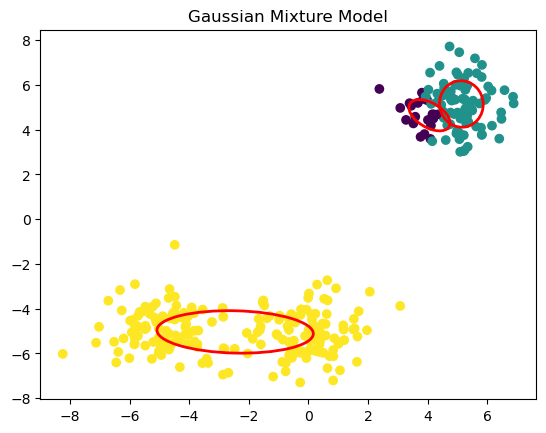

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Function to initialize parameters
def initialize_parameters(X, K):
    N, D = X.shape
    pi = np.ones(K) / K  # Mixing coefficients (uniform initialization)
    mu = X[np.random.choice(N, K, False)]  # Means (random points from the data)
    sigma = np.array([np.cov(X.T)] * K)  # Covariances (initializing to same covariance)
    
    return pi, mu, sigma

# E-step: Compute responsibilities
def e_step(X, pi, mu, sigma):
    N, K = X.shape[0], len(pi)
    gamma = np.zeros((N, K))  # Responsibility matrix
    
    for k in range(K):
        rv = multivariate_normal(mu[k], sigma[k])
        gamma[:, k] = pi[k] * rv.pdf(X)
    
    # Normalize responsibilities
    gamma = gamma / gamma.sum(axis=1, keepdims=True)
    return gamma

# M-step: Update parameters (means, covariances, and mixing coefficients)
def m_step(X, gamma):
    N, D = X.shape
    K = gamma.shape[1]
    
    Nk = gamma.sum(axis=0)  # Total responsibility for each cluster
    pi = Nk / N  # Mixing coefficients
    mu = np.dot(gamma.T, X) / Nk[:, None]  # Updated means
    sigma = np.zeros((K, D, D))  # Updated covariances
    
    for k in range(K):
        diff = X - mu[k]
        sigma[k] = np.dot(gamma[:, k] * diff.T, diff) / Nk[k]
    
    return pi, mu, sigma

# EM Algorithm for GMM
def em_algorithm(X, K, max_iter=100, tol=1e-6):
    # Initialize parameters
    pi, mu, sigma = initialize_parameters(X, K)
    
    log_likelihood_old = 0
    for iteration in range(max_iter):
        # E-step
        gamma = e_step(X, pi, mu, sigma)
        
        # M-step
        pi, mu, sigma = m_step(X, gamma)
        
        # Compute the log likelihood
        log_likelihood_new = np.sum(np.log(np.dot(gamma, pi)))
        
        # Check for convergence
        if np.abs(log_likelihood_new - log_likelihood_old) < tol:
            print(f"Converged at iteration {iteration}")
            break
        
        log_likelihood_old = log_likelihood_new
    
    return pi, mu, sigma, gamma

# Visualize the results
def plot_gmm(X, mu, sigma, gamma, K):
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(gamma, axis=1), cmap='viridis', zorder=1)
    
    # Plot the ellipses for the Gaussian components
    for k in range(K):
        eigvals, eigvecs = np.linalg.eigh(sigma[k])
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0])
        width, height = 2 * np.sqrt(eigvals)
        
        ell = plt.matplotlib.patches.Ellipse(mu[k], width, height, angle=np.degrees(angle), color='red', fill=False, linewidth=2)
        plt.gca().add_patch(ell)
    
    plt.title("Gaussian Mixture Model")
    plt.show()

# Example Usage with 2D data:
np.random.seed(42)
N = 300
D = 2
K = 3

# Generate synthetic 2D data from 3 Gaussians
X1 = np.random.randn(N//3, 2) + np.array([5, 5])
X2 = np.random.randn(N//3, 2) + np.array([-5, -5])
X3 = np.random.randn(N//3, 2) + np.array([0, -5])

X = np.vstack([X1, X2, X3])

# Run EM algorithm
pi, mu, sigma, gamma = em_algorithm(X, K)

# Plot the results
plot_gmm(X, mu, sigma, gamma, K)


Converged at iteration 9


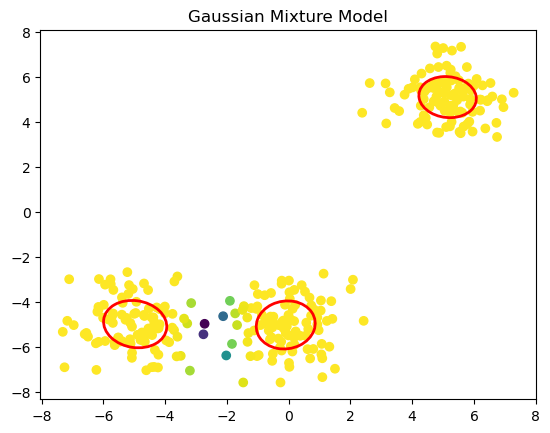

In [9]:
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

# Function to initialize parameters
def initialize_parameters(X, K):
    N, D = len(X), len(X[0])
    
    # Initialize mixing coefficients (uniform initialization)
    pi = [1 / K] * K 
    
    # Randomly initialize means as random data points
    mu = random.sample(X, K)
    
    # Initialize covariance matrices to the identity matrix
    sigma = []
    for _ in range(K):
        sigma.append(np.identity(D))  # Use identity matrix for covariance initialization
    
    return pi, mu, sigma

# E-step: Compute responsibilities
def e_step(X, pi, mu, sigma):
    N, K = len(X), len(pi)
    gamma = []

    # Compute responsibilities for each data point and each Gaussian component
    for i in range(N):
        point = X[i]
        responsibilities = []
        
        total_prob = 0
        for k in range(K):
            # Compute the probability density for this point under the k-th Gaussian component
            try:
                rv = multivariate_normal(mu[k], sigma[k])
                prob = pi[k] * rv.pdf(point)
                responsibilities.append(prob)
                total_prob += prob
            except np.linalg.LinAlgError:
                # In case of a singular matrix, treat the probability as 0
                responsibilities.append(0)
                total_prob += 0
        
        # Normalize to get the responsibilities (posterior probabilities)
        responsibilities = [r / total_prob if total_prob > 0 else 0 for r in responsibilities]
        gamma.append(responsibilities)
    
    return gamma

# M-step: Update parameters (means, covariances, and mixing coefficients)
def m_step(X, gamma):
    N, D = len(X), len(X[0])
    K = len(gamma[0])

    # Update mixing coefficients
    Nk = [sum([gamma[n][k] for n in range(N)]) for k in range(K)]
    pi = [nk / N for nk in Nk]

    # Update means
    mu = []
    for k in range(K):
        numerator = [sum([gamma[n][k] * X[n][d] for n in range(N)]) for d in range(D)]
        denominator = Nk[k]
        mean_k = [numerator[d] / denominator for d in range(D)]
        mu.append(mean_k)

    # Regularization term for covariance matrices
    epsilon = 1e-6  # Small regularization term to avoid singular matrices

    # Update covariance matrices
    sigma = []
    for k in range(K):
        cov_matrix = np.zeros((D, D))
        for n in range(N):
            diff = np.array(X[n]) - np.array(mu[k])
            cov_matrix += gamma[n][k] * np.outer(diff, diff)
        
        cov_matrix /= Nk[k]
        
        # Add regularization to the covariance matrix
        cov_matrix += epsilon * np.identity(D)
        
        sigma.append(cov_matrix)
    
    return pi, mu, sigma

# EM Algorithm for GMM
def em_algorithm(X, K, max_iter=100, tol=1e-6):
    pi, mu, sigma = initialize_parameters(X, K)

    log_likelihood_old = 0
    for iteration in range(max_iter):
        # E-step: Compute responsibilities
        gamma = e_step(X, pi, mu, sigma)
        
        # M-step: Update parameters
        pi, mu, sigma = m_step(X, gamma)
        
        # Compute the log likelihood
        log_likelihood_new = sum([math.log(sum([gamma[n][k] * pi[k] * multivariate_normal(mu[k], sigma[k]).pdf(X[n]) for k in range(K)])) for n in range(len(X))])
        
        # Check for convergence
        if abs(log_likelihood_new - log_likelihood_old) < tol:
            print(f"Converged at iteration {iteration}")
            break
        
        log_likelihood_old = log_likelihood_new
    
    return pi, mu, sigma, gamma

# Visualize the results
def plot_gmm(X, mu, sigma, gamma, K):
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=[max(g, key=lambda x: x) for g in gamma], cmap='viridis', zorder=1)
    
    # Plot the ellipses for the Gaussian components
    for k in range(K):
        eigvals, eigvecs = np.linalg.eig(sigma[k])
        angle = math.atan2(eigvecs[1, 0], eigvecs[0, 0])
        width, height = 2 * math.sqrt(eigvals[0]), 2 * math.sqrt(eigvals[1])
        
        ell = plt.matplotlib.patches.Ellipse(mu[k], width, height, angle=math.degrees(angle), color='red', fill=False, linewidth=2)
        plt.gca().add_patch(ell)
    
    plt.title("Gaussian Mixture Model")
    plt.show()

# Example Usage with 2D data:
random.seed(42)
N = 300
D = 2
K = 3

# Generate synthetic 2D data from 3 Gaussians
X1 = [[random.gauss(5, 1), random.gauss(5, 1)] for _ in range(N//3)]
X2 = [[random.gauss(-5, 1), random.gauss(-5, 1)] for _ in range(N//3)]
X3 = [[random.gauss(0, 1), random.gauss(-5, 1)] for _ in range(N//3)]

X = X1 + X2 + X3

# Run EM algorithm
pi, mu, sigma, gamma = em_algorithm(X, K)

# Plot the results
plot_gmm(X, mu, sigma, gamma, K)


##  Gaussian Mixtures Revisited

We now consider the application of this latent variable view of EM to the specific case of a Gaussian mixture model. Recall that our goal is to maximize the log likelihood function $ p(X | \theta) $, which is computed using the observed data set $ X $. This was more difficult for a mixture model due to the summation over components inside the logarithm. Suppose that in addition to the observed dataset $ X $, we were also given the values of the corresponding discrete latent variables $ Z $.

The graphical model for the complete data is shown in Fig.9. The likelihood of the complete data set $ \{X, Z\} $ is given by:

$$
p(X, Z | \mu, \Sigma, \pi) = \prod_{n=1}^{N} \prod_{k=1}^{K} \pi_k^{z_{nk}} \mathcal{N}(x_n | \mu_k, \Sigma_k)^{z_{nk}}
$$

where \( z_{nk} \) denotes the component indicator for the \( n \)-th data point. The log-likelihood function is:

$$
\ln p(X, Z | \mu, \Sigma, \pi) = \sum_{n=1}^{N} \sum_{k=1}^{K} z_{nk} \left( \ln \pi_k + \ln \mathcal{N}(x_n | \mu_k, \Sigma_k) \right)
$$

### Maximization with Respect to Means and Covariances

Because $ z_n $ is a $ K $-dimensional vector with all elements equal to 0 except for a single element having the value 1, the complete-data log-likelihood function becomes a sum of $ K $ independent contributions, one for each mixture component. The maximization with respect to the means $ \mu_k $ and covariances $ \Sigma_k $ is exactly the same as for a single Gaussian, except that it involves only the subset of data points that are 'assigned' to that component.

### Maximization with Respect to Mixing Coefficients

For the maximization with respect to the mixing coefficients $ \pi_k $, we use the Lagrange multiplier method, yielding:

$$
\pi_k = \frac{1}{N} \sum_{n=1}^{N} z_{nk}
$$

Thus, the mixing coefficients are equal to the fractions of data points assigned to each component.

### Expectation-Maximization (EM) Algorithm

Since we do not have the values of the latent variables $ Z $, we instead take the expectation of the complete-data log likelihood with respect to the posterior distribution of $ Z $. Using Bayes' theorem, the posterior distribution is given by:

$$
p(Z | X, \mu, \Sigma, \pi) \propto \prod_{n=1}^{N} \prod_{k=1}^{K} \left[ \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k) \right]^{z_{nk}}
$$

Under this posterior distribution, the expected value of the indicator variable $ z_{nk} $ is the responsibility $ \gamma(z_{nk}) $, which is the probability that data point $ x_n $ comes from the $ k $-th Gaussian component. The expected value of the complete-data log likelihood is:

$$
\mathbb{E}_Z \left[ \ln p(X, Z | \mu, \Sigma, \pi) \right] = \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(z_{nk}) \left( \ln \pi_k + \ln \mathcal{N}(x_n | \mu_k, \Sigma_k) \right)
$$

### E-Step and M-Step

1. **E-step**: Compute the responsibilities $ \gamma(z_{nk}) $ using the current estimates of the parameters $ \mu $, $ \Sigma $, and $ \pi $.
   
2. **M-step**: Maximize the expected complete-data log likelihood with respect to $ \mu_k $, $ \Sigma_k $, and $ \pi_k $. This leads to the following closed-form solutions for $ \mu_k $, $ \Sigma_k $, and $ \pi_k $:

   - For the means:
     $$ \mu_k = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) x_n}{\sum_{n=1}^{N} \gamma(z_{nk})} $$

   - For the covariances:
     $$ \Sigma_k = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_k)(x_n - \mu_k)^T}{\sum_{n=1}^{N} \gamma(z_{nk})} $$

   - For the mixing coefficients:
     $$ \pi_k = \frac{1}{N} \sum_{n=1}^{N} \gamma(z_{nk}) $$

This forms the core of the EM algorithm for Gaussian mixtures, where the algorithm iterates between the E-step (computing responsibilities) and the M-step (updating parameters) until convergence.


In [11]:
import random
import math

# Generate synthetic data
def generate_data(N, K, pi, mu, sigma):
    X = []
    Z = []
    for n in range(N):
        k = random.choices(range(K), pi)[0]
        Z.append(k)
        x = [random.gauss(mu[k][d], math.sqrt(sigma[k][d][d])) for d in range(len(mu[k]))]
        X.append(x)
    return X, Z

# Gaussian PDF
import math

# Gaussian PDF
def gaussian_pdf(x, mu, sigma):
    dim = len(x)
    diff = [x[d] - mu[d] for d in range(dim)]
    
    # Assuming diagonal covariance, sigma is a list of lists (diagonal covariance matrix)
    det_sigma = 1
    for i in range(dim):
        det_sigma *= sigma[i][i]  # Product of diagonal elements (determinant of diagonal matrix)

    # Compute exponent part of the Gaussian distribution
    exponent = -0.5 * sum([diff[d] * diff[d] / sigma[d][d] for d in range(dim)])

    # Return the full Gaussian PDF formula
    return (1 / (math.pow(2 * math.pi, dim / 2) * math.sqrt(det_sigma))) * math.exp(exponent)


# E-step: Compute responsibilities (gamma)
def e_step(X, pi, mu, sigma, K):
    gamma = []
    for x in X:
        responsibilities = []
        total_prob = 0
        for k in range(K):
            prob = pi[k] * gaussian_pdf(x, mu[k], sigma[k])
            responsibilities.append(prob)
            total_prob += prob
        responsibilities = [r / total_prob for r in responsibilities]
        gamma.append(responsibilities)
    return gamma

# M-step: Update parameters (pi, mu, sigma)
def m_step(X, gamma, K):
    N = len(X)
    D = len(X[0])
    pi = [sum(gamma[n][k] for n in range(N)) / N for k in range(K)]
    mu = []
    sigma = []
    for k in range(K):
        weighted_sum = [0] * D
        for n in range(N):
            for d in range(D):
                weighted_sum[d] += gamma[n][k] * X[n][d]
        mu_k = [ws / sum(gamma[n][k] for n in range(N)) for ws in weighted_sum]
        mu.append(mu_k)

        # Update sigma (assume diagonal covariance)
        sigma_k = [[0] * D for _ in range(D)]
        for n in range(N):
            diff = [X[n][d] - mu_k[d] for d in range(D)]
            for d1 in range(D):
                for d2 in range(D):
                    sigma_k[d1][d2] += gamma[n][k] * diff[d1] * diff[d2]
        sigma_k = [[s / sum(gamma[n][k] for n in range(N)) for s in row] for row in sigma_k]
        sigma.append(sigma_k)

    return pi, mu, sigma

# EM algorithm for GMM
def em_algorithm(X, K, max_iter=100, tol=1e-6):
    N = len(X)
    D = len(X[0])

    # Initializing parameters
    pi = [1 / K] * K  # Mixing coefficients
    mu = [[random.uniform(min([x[d] for x in X]), max([x[d] for x in X])) for d in range(D)] for _ in range(K)]
    sigma = [[[random.uniform(0.5, 1) for _ in range(D)] for _ in range(D)] for _ in range(K)]  # Diagonal covariance matrices

    prev_log_likelihood = None
    for i in range(max_iter):
        # E-step: Compute responsibilities (gamma)
        gamma = e_step(X, pi, mu, sigma, K)

        # M-step: Update parameters
        pi, mu, sigma = m_step(X, gamma, K)

        # Compute log-likelihood to check for convergence
        log_likelihood = 0
        for n in range(N):
            total_prob = 0
            for k in range(K):
                total_prob += pi[k] * gaussian_pdf(X[n], mu[k], sigma[k])
            log_likelihood += math.log(total_prob)

        # Check for convergence
        if prev_log_likelihood and abs(log_likelihood - prev_log_likelihood) < tol:
            print(f"Converged after {i} iterations.")
            break

        prev_log_likelihood = log_likelihood

    return pi, mu, sigma, gamma


# Example usage:
N = 300  # Number of data points
K = 2  # Number of Gaussian components
pi = [0.6, 0.4]  # Mixing coefficients
mu = [[5, 5], [-5, -5]]  # Means
sigma = [[[1, 0], [0, 1]], [[1, 0], [0, 1]]]  # Covariance matrices

# Generate synthetic data
X, Z = generate_data(N, K, pi, mu, sigma)

# Run EM algorithm
pi, mu, sigma, gamma = em_algorithm(X, K)

print("Estimated pi:", pi)
print("Estimated mu:", mu)
print("Estimated sigma:", sigma)


Converged after 1 iterations.
Estimated pi: [0.3933333333333333, 0.6066666666666667]
Estimated mu: [[-5.207963453985319, -4.947553571843446], [5.010529805565083, 5.075336841286846]]
Estimated sigma: [[[1.0238055826031522, 0.039403089103004406], [0.039403089103004406, 0.935133578800147]], [[0.8486986685000131, -0.056982146311057684], [-0.056982146311057684, 1.0193596996937417]]]


Convergence reached at iteration 21


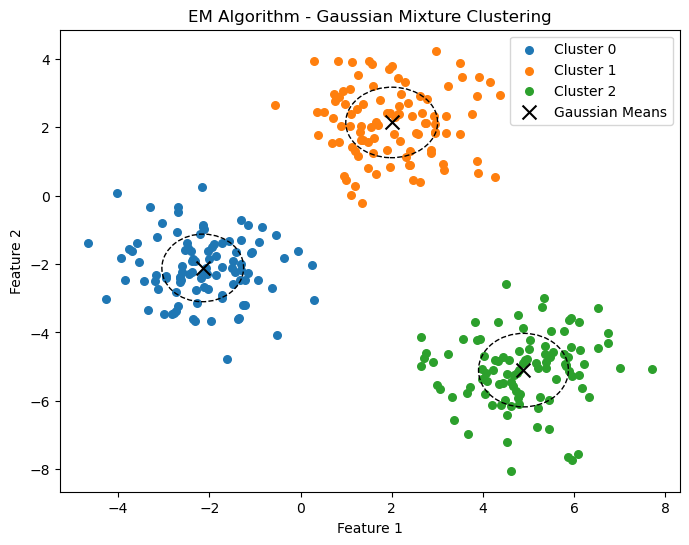

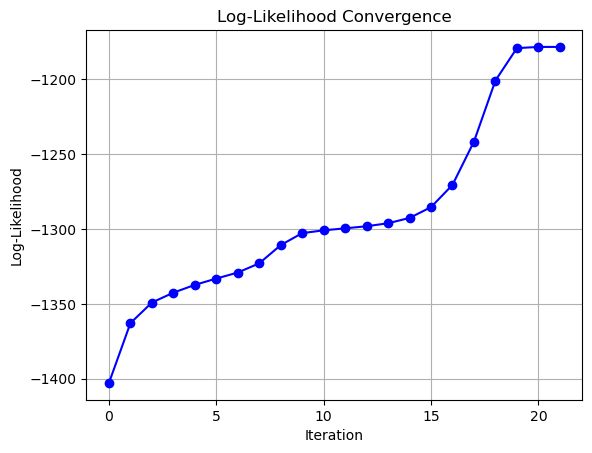

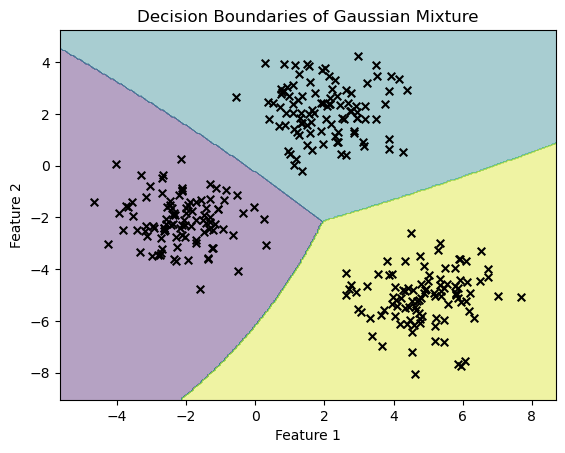

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Gaussian PDF
def gaussian_pdf(x, mu, sigma):
    dim = len(x)
    diff = [x[d] - mu[d] for d in range(dim)]
    inv_sigma = np.linalg.inv(sigma)  # Inverse of covariance matrix
    det_sigma = np.linalg.det(sigma)  # Determinant of covariance matrix
    exponent = -0.5 * np.dot(diff, np.dot(inv_sigma, diff))
    return (1 / (math.pow(2 * math.pi, dim / 2) * math.sqrt(det_sigma))) * math.exp(exponent)

# E-step: Compute responsibilities
def e_step(X, pi, mu, sigma, K):
    N = X.shape[0]
    gamma = np.zeros((N, K))  # Responsibilities matrix
    for n in range(N):
        total_prob = 0
        for k in range(K):
            prob = pi[k] * gaussian_pdf(X[n], mu[k], sigma[k])
            gamma[n, k] = prob
            total_prob += prob
        # Normalize responsibilities
        gamma[n, :] /= total_prob
    return gamma

# M-step: Update parameters
def m_step(X, gamma, K):
    N, D = X.shape
    mu = np.zeros((K, D))
    sigma = np.zeros((K, D, D))
    pi = np.zeros(K)
    
    for k in range(K):
        # Weight for the k-th component
        Nk = np.sum(gamma[:, k])
        
        # Update mean
        mu[k] = np.sum(gamma[:, k].reshape(-1, 1) * X, axis=0) / Nk
        
        # Update covariance
        diff = X - mu[k]
        weighted_diff = gamma[:, k].reshape(-1, 1) * diff  # Shape (N, D)
        sigma[k] = np.dot(weighted_diff.T, diff) / Nk  # Covariance matrix for k-th component
        
        # Update mixing coefficient
        pi[k] = Nk / N
    
    return pi, mu, sigma

# EM Algorithm for Gaussian Mixtures
def em_algorithm(X, K, max_iter=100, tol=1e-4):
    N, D = X.shape
    # Initialize parameters
    mu = np.random.randn(K, D)  # Means of the Gaussians
    sigma = np.array([np.eye(D) for _ in range(K)])  # Covariances (diagonal covariance)
    pi = np.ones(K) / K  # Mixing coefficients
    
    log_likelihoods = []
    
    for iteration in range(max_iter):
        # E-step: Calculate responsibilities
        gamma = e_step(X, pi, mu, sigma, K)
        
        # M-step: Update parameters
        pi, mu, sigma = m_step(X, gamma, K)
        
        # Calculate log-likelihood
        log_likelihood = 0
        for n in range(N):
            likelihood = 0
            for k in range(K):
                likelihood += pi[k] * gaussian_pdf(X[n], mu[k], sigma[k])
            log_likelihood += np.log(likelihood)
        
        log_likelihoods.append(log_likelihood)
        
        # Check for convergence
        if iteration > 0 and abs(log_likelihood - log_likelihoods[-2]) < tol:
            print(f"Convergence reached at iteration {iteration}")
            break
    
    return pi, mu, sigma, gamma, log_likelihoods

# Plot clusters and Gaussians
def plot_clusters(X, pi, mu, sigma, gamma):
    cluster_assignments = np.argmax(gamma, axis=1)
    unique_clusters = np.unique(cluster_assignments)

    plt.figure(figsize=(8, 6))
    for cluster in unique_clusters:
        cluster_points = X[cluster_assignments == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', s=30)

    # Plot Gaussian Means
    plt.scatter(mu[:, 0], mu[:, 1], c='black', marker='x', label='Gaussian Means', s=100)

    # Plot covariances as ellipses
    for i in range(len(mu)):
        eigvals, eigvecs = np.linalg.eigh(sigma[i])  # Eigenvalues and eigenvectors
        angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0])
        width, height = 2 * np.sqrt(eigvals)  # 2*sqrt(eigenvalue gives the width/height of the ellipse)
        ell = plt.matplotlib.patches.Ellipse(mu[i], width, height, angle=angle, edgecolor='black', facecolor='none', linestyle='--')
        plt.gca().add_patch(ell)

    plt.title("EM Algorithm - Gaussian Mixture Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Plot log-likelihood convergence
def plot_log_likelihood(log_likelihoods):
    plt.plot(range(len(log_likelihoods)), log_likelihoods, marker='o', color='b')
    plt.title("Log-Likelihood Convergence")
    plt.xlabel("Iteration")
    plt.ylabel("Log-Likelihood")
    plt.grid(True)
    plt.show()

# Plot decision boundaries
def plot_decision_boundaries(X, pi, mu, sigma, gamma):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    grid_gamma = np.zeros((grid_points.shape[0], K))
    for i, point in enumerate(grid_points):
        for k in range(K):
            grid_gamma[i, k] = pi[k] * gaussian_pdf(point, mu[k], sigma[k])

    grid_assignments = np.argmax(grid_gamma, axis=1)
    grid_assignments = grid_assignments.reshape(xx.shape)

    plt.contourf(xx, yy, grid_assignments, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c='black', s=30, marker='x', label='Data points')
    plt.title("Decision Boundaries of Gaussian Mixture")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Example of running the EM algorithm and plotting the results
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(0)
    X1 = np.random.randn(100, 2) + np.array([2, 2])
    X2 = np.random.randn(100, 2) + np.array([-2, -2])
    X3 = np.random.randn(100, 2) + np.array([5, -5])
    X = np.vstack([X1, X2, X3])

    # Number of components in the GMM
    K = 3

    # Run EM algorithm
    pi, mu, sigma, gamma, log_likelihoods = em_algorithm(X, K)

    # Plot the clusters and Gaussian components
    plot_clusters(X, pi, mu, sigma, gamma)

    # Plot the log-likelihood convergence
    plot_log_likelihood(log_likelihoods)

    # Plot the decision boundaries
    plot_decision_boundaries(X, pi, mu, sigma, gamma)
